In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
from OGMM import fit, predict, log_like

import numpy as np
from sklearn.datasets import make_blobs

In [26]:
n_samples = 6400000
centers = [[-5]*5, [0]*5, [5]*5]
cluster_std = [0.5, 1, 0.5]


X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std)

n_components = 3
batch_size = 64

pi, mu, sigma = fit(X, n_components, batch_size)

/Users/geoffroy/miniconda3/envs/online/lib/python3.10/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [32]:
log_like(X, pi, mu, sigma)

DeviceArray([-10.570694,  -9.908886, -10.303398, ..., -12.663961,
             -10.346294, -15.580912], dtype=float32)

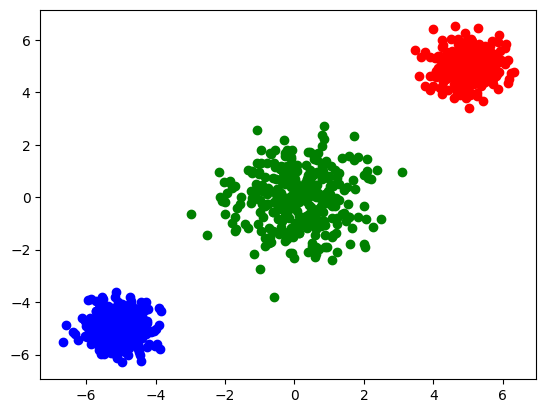

In [27]:
import matplotlib.pyplot as plt

labels = np.array(predict(X, pi, mu, sigma))

color_dict = {0: 'red', 1: 'blue', 2: 'green'}


for i, point in enumerate(X[:1000]):
    label = labels[i]
    color = color_dict[label]
    plt.scatter(point[0], point[1], c=color) 


plt.show()
